# **Importando dependências**
Fazemos aqui a importação das libs: pandas para leitura do arquivo, seaborn e matplotlib para criação de gráficos e sklearn para geração e analise de modelos preditivos

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **1 - Exploração de dados**
Aqui carregamos o arquivo de dados e criamos uma variável contendo a lib de encode das strings em número

In [43]:
data = pd.read_csv('data.csv')
encoder = LabelEncoder()

Aqui visualizamos os cabeçalhos da tabela que iremos analizar e as métricas de médias

In [44]:
data.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,26,feminino,30.7,4,não,centro-oeste,10429.6962
1,62,masculino,38.2,4,não,centro-oeste,16215.4564
2,82,masculino,40.9,0,sim,sul,30668.0904
3,25,masculino,33.1,3,sim,nordeste,16745.5392
4,48,feminino,27.6,4,não,nordeste,11453.6016


In [51]:
data.describe()

,idade,genero,imc,filhos,fumante,regiao,encargos
count,5178.000000,5178.00000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000
mean,53.475280,0.50618,31.024025,1.959830,0.488799,2.001738,17051.245839
std,20.987286,0.50001,11.034030,1.414736,0.499923,1.418645,5790.961905
min,18.000000,0.00000,12.000000,0.000000,0.000000,0.000000,5045.264000
25%,35.000000,0.00000,21.400000,1.000000,0.000000,1.000000,12707.113700
50%,53.000000,1.00000,31.100000,2.000000,0.000000,2.000000,16399.956700
75%,72.000000,1.00000,40.600000,3.000000,1.000000,3.000000,20764.398250
max,89.000000,1.00000,49.900000,4.000000,1.000000,4.000000,35346.510000


# **Correlação entre os dados**

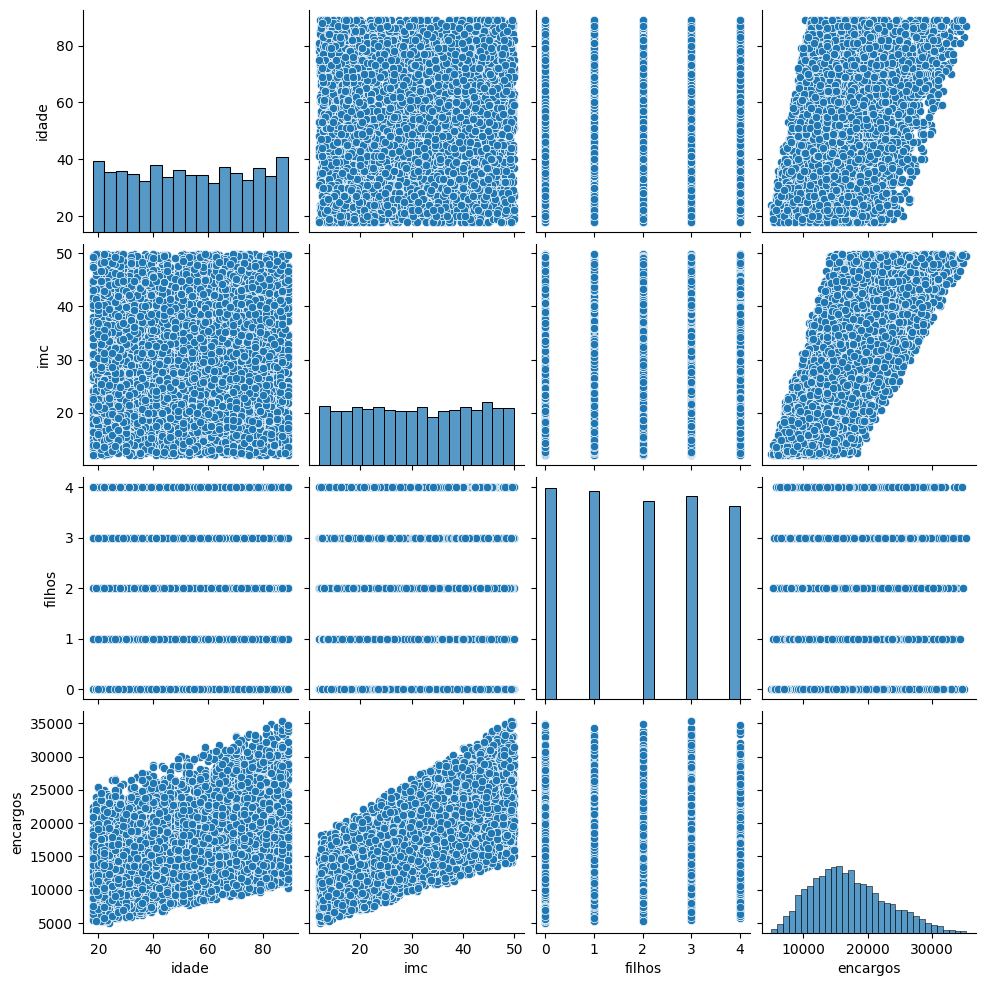

In [29]:
sns.pairplot(data)

### **2 - Pré-processamento dos dados**

In [45]:
data['genero'] = encoder.fit_transform(data['genero'])
data['fumante'] = encoder.fit_transform(data['fumante'])
data['regiao'] = encoder.fit_transform(data['regiao'])

X = data.drop('encargos', axis=1)
y = data['encargos']

data.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,26,0,30.7,4,0,0,10429.6962
1,62,1,38.2,4,0,0,16215.4564
2,82,1,40.9,0,1,4,30668.0904
3,25,1,33.1,3,1,1,16745.5392
4,48,0,27.6,4,0,1,11453.6016


### **3 - Modelagem e Treinamento**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho da tabela de dados:", len(X_train))
print("Tamanho da tabela de teste:", len(X_test))

Tamanho do conjunto de treinamento: 4142
Tamanho do conjunto de teste: 1036


Aqui instanciamos o modelo de regressão linear, aplicamos o treino e a predição.

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## **4 - Avaliação do modelo gerado**

Regressão Linear
Erro quadrático médio 'MSE': 1212138.899013482
R2 Score: 0.9594064446968454


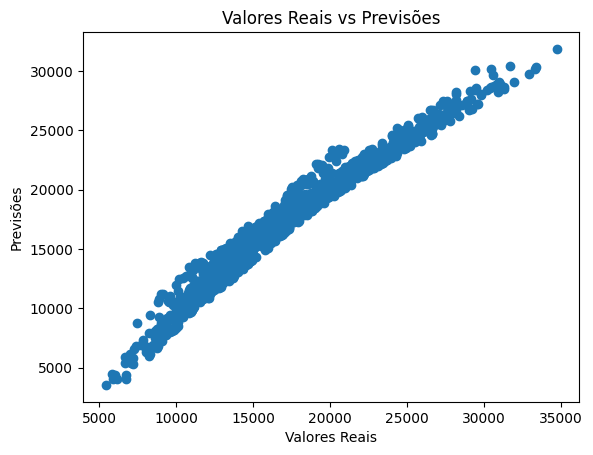

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regressão Linear")
print("Erro quadrático médio 'MSE':", mse)
print("======================================")
print("R2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()